<a href="https://colab.research.google.com/github/ulijese/arg_prog4/blob/main/ej_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis exploratorio de datos - Total vacunas covid-19 Ciudad de Buenos Aires**

# **Método local**




In [4]:
import pandas as pd
import io
import os

Subo el archivo csv desde github, lo convierte en dataset

In [6]:
# Archivo en formato csv desde github
url = 'https://raw.githubusercontent.com/ulijese/arg_prog4/main/dataset_total_vacunas.csv'
df = pd.read_csv(url)
df.head(10)

,FECHA_ADMINISTRACION,GRUPO_ETARIO,GENERO,VACUNA,TIPO_EFECTOR,DOSIS_1,DOSIS_2,ID_CARGA,DOSIS_3
0,15JAN2021:00:00:00,30 o menos,F,Sputnik,Privado,157,0,NaN,0.0
1,15JAN2021:00:00:00,30 o menos,F,Sputnik,Público,255,0,NaN,0.0
2,15JAN2021:00:00:00,30 o menos,F,Sputnik,Público nacional,37,0,NaN,0.0
3,15JAN2021:00:00:00,30 o menos,M,Sputnik,Privado,69,0,NaN,0.0
4,15JAN2021:00:00:00,30 o menos,M,Sputnik,Público,130,0,NaN,0.0
5,15JAN2021:00:00:00,30 o menos,M,Sputnik,Público nacional,16,0,NaN,0.0
6,15JAN2021:00:00:00,31 a 40,F,Sputnik,Privado,251,0,NaN,0.0
7,15JAN2021:00:00:00,31 a 40,F,Sputnik,Público,469,0,NaN,0.0
8,15JAN2021:00:00:00,31 a 40,F,Sputnik,Público nacional,50,0,NaN,0.0
9,15JAN2021:00:00:00,31 a 40,M,Sputnik,Privado,160,0,NaN,0.0


In [7]:
# Método type:
type(df)

pandas.core.frame.DataFrame

In [8]:
# el tamaño del dataset:
df.shape
print('El df tiene {} instancias y {} features'.format(df.shape[0],df.shape[1]))

El df tiene 48593 instancias y 9 features


In [9]:
# el tipo de variables contenidas en el df
df.dtypes

FECHA_ADMINISTRACION     object
GRUPO_ETARIO             object
GENERO                   object
VACUNA                   object
TIPO_EFECTOR             object
DOSIS_1                   int64
DOSIS_2                   int64
ID_CARGA                float64
DOSIS_3                 float64
dtype: object

# **Breve descripción gráfica**
### Asistencia a los vacunatorios de acuerdo a Grupo Etario

<Axes: title={'center': 'Grupo Etario'}, ylabel='Cant'>

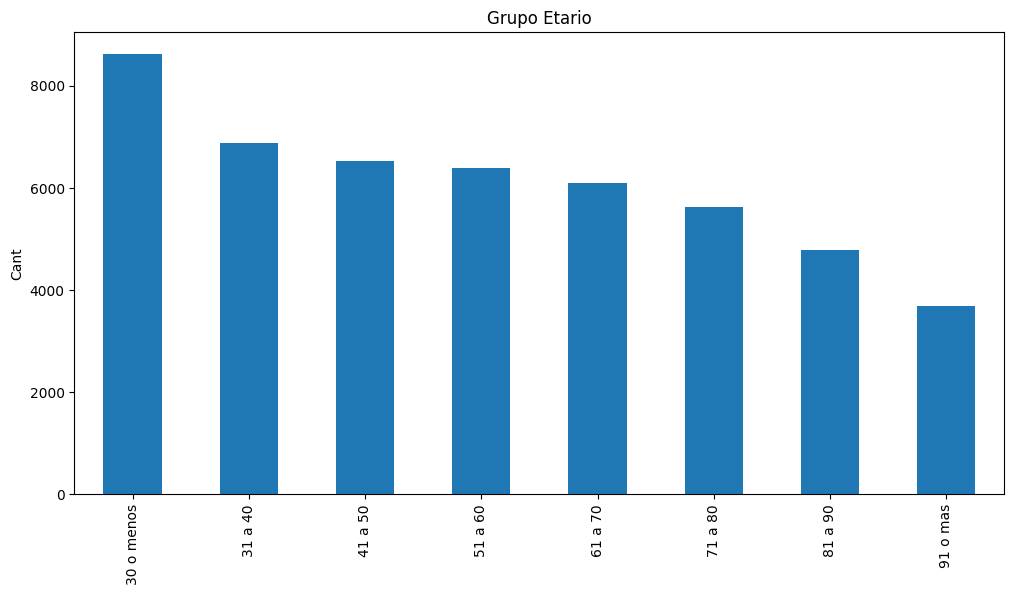

In [ ]:
df['GRUPO_ETARIO'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Cant', title='Grupo Etario')

<Axes: title={'center': 'Cantidad vs tipo de vacuna'}, ylabel='Cant'>

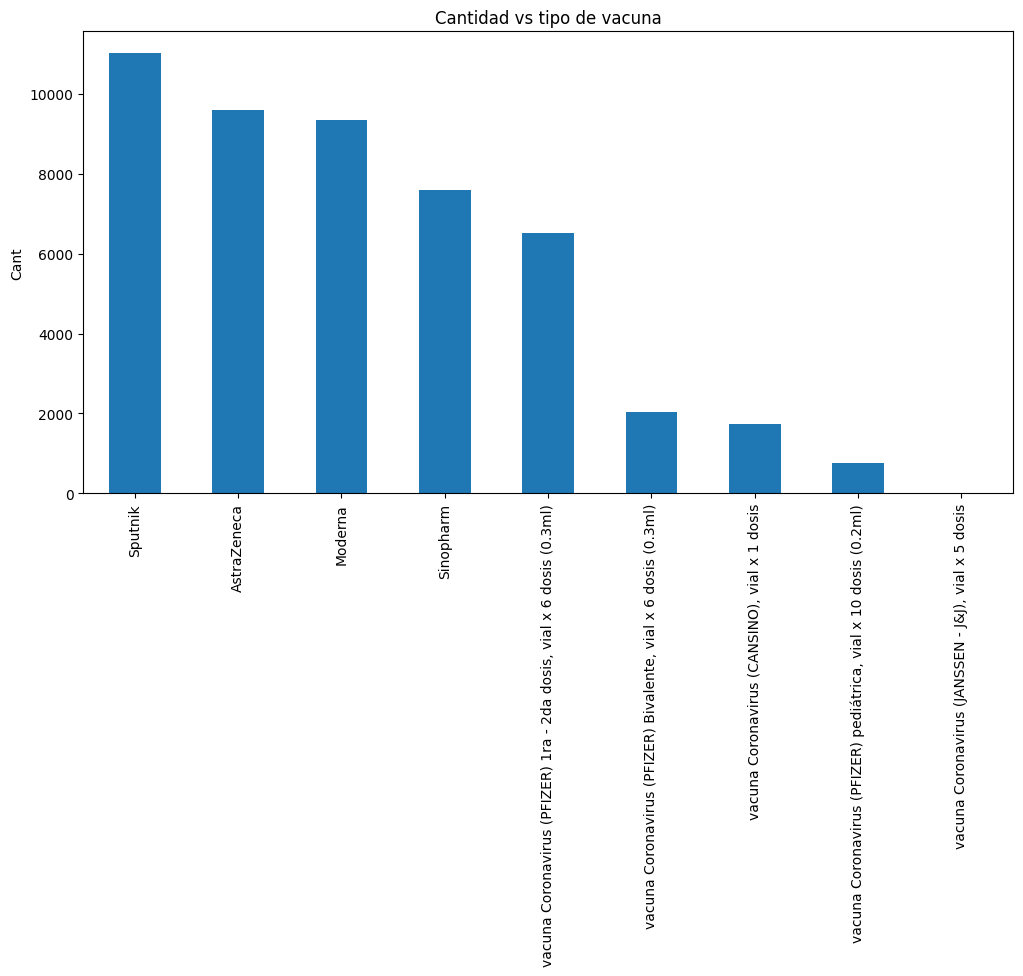

In [ ]:
# Mismo gráfico, pero verificando fechas
df['VACUNA'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Cant', title='Cantidad vs tipo de vacuna')

In [ ]:
# filtramos la cantidad de nulos
df.isnull().sum()

FECHA_ADMINISTRACION        0
GRUPO_ETARIO                0
GENERO                      0
VACUNA                      0
TIPO_EFECTOR                0
DOSIS_1                     0
DOSIS_2                     0
ID_CARGA                48593
DOSIS_3                    82
dtype: int64

In [ ]:
df.isna().sum()

FECHA_ADMINISTRACION        0
GRUPO_ETARIO                0
GENERO                      0
VACUNA                      0
TIPO_EFECTOR                0
DOSIS_1                     0
DOSIS_2                     0
ID_CARGA                48593
DOSIS_3                    82
dtype: int64

In [ ]:
# Seleccionamos una variable:
df['VACUNA']

0                                                  Sputnik
1                                                  Sputnik
2                                                  Sputnik
3                                                  Sputnik
4                                                  Sputnik
                               ...                        
48588                                              Moderna
48589    vacuna Coronavirus (PFIZER) Bivalente, vial x ...
48590                                              Moderna
48591    vacuna Coronavirus (PFIZER) Bivalente, vial x ...
48592                                              Moderna
Name: VACUNA, Length: 48593, dtype: object

In [ ]:
# un elemento de la variable df['VACUNA']
df['VACUNA'][45555]

'vacuna Coronavirus (PFIZER) 1ra - 2da dosis, vial x 6 dosis (0.3ml)'

In [ ]:
# Método value_counts:
df['VACUNA'].value_counts()

Sputnik                                                                11013
AstraZeneca                                                             9588
Moderna                                                                 9347
Sinopharm                                                               7592
vacuna Coronavirus (PFIZER) 1ra - 2da dosis, vial x 6 dosis (0.3ml)     6528
vacuna Coronavirus (PFIZER) Bivalente, vial x 6 dosis (0.3ml)           2041
vacuna Coronavirus (CANSINO), vial x 1 dosis                            1734
vacuna Coronavirus (PFIZER) pediátrica, vial x 10 dosis (0.2ml)          749
vacuna Coronavirus (JANSSEN - J&J), vial x 5 dosis                         1
Name: VACUNA, dtype: int64

In [ ]:
df['GENERO'].value_counts()

F    25105
M    23373
N      115
Name: GENERO, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48593 entries, 0 to 48592
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FECHA_ADMINISTRACION  48593 non-null  object 
 1   GRUPO_ETARIO          48593 non-null  object 
 2   GENERO                48593 non-null  object 
 3   VACUNA                48593 non-null  object 
 4   TIPO_EFECTOR          48593 non-null  object 
 5   DOSIS_1               48593 non-null  int64  
 6   DOSIS_2               48593 non-null  int64  
 7   ID_CARGA              0 non-null      float64
 8   DOSIS_3               48511 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.3+ MB


In [10]:
df['FECHA_ADMINISTRACION'].value_counts()

28JAN2022:00:00:00    130
31JAN2022:00:00:00    130
21JAN2022:00:00:00    128
02FEB2022:00:00:00    124
11NOV2021:00:00:00    123
                     ... 
15FEB2021:00:00:00      5
09APR2023:00:00:00      5
25DEC2022:00:00:00      4
21FEB2023:00:00:00      2
01JAN2021:00:00:00      2
Name: FECHA_ADMINISTRACION, Length: 882, dtype: int64

Ver si puedo hacer que la columna 'FECHA_ADMINISTRACION' sea del tipo date;

In [11]:
df["FECHA_ADMINISTRACION"] = pd.to_datetime(df["FECHA_ADMINISTRACION"]).dt.date

ParserError: ignored